# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [258]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# for metrics
from sklearn import metrics

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [259]:
churn_DataSet = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [260]:
churn_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observations: 
- There is a split between numeric and categorical type variables. 
- float64(5), int64(10), object(6)


In [261]:
churn_DataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


#### Observations
- Provides details on the distribution of the numberic data

In [262]:
churn_DataSet.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [263]:
# let's check for missing values in the data and retrurn %
round(churn_DataSet.isnull().sum() / churn_DataSet.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

### Observations:
- Education level is missing 15%
-  MArital status is missing 7.4%

In [264]:
# Copying the data to separate dataframe that will be used for analysis
churn = churn_DataSet.copy()

In [265]:
# Review churn dataset information
churn_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [266]:
# Review unique information in education level
churn["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [267]:
# Review unique information in income category
churn["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

Observation: There is unknown data "abc", we will set to na so it can be imputed later

In [268]:
# Replace column value "abc" in income with none and will impute later
churn["Income_Category"].replace('abc',None,inplace=True)

In [269]:
# let's check for missing values in the data and retrurn %
round(churn.isnull().sum() / churn.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category            10.980
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

Observations: We can see 10.98% Income now so this data will be imputed later.

Check for duplicates


In [270]:
# let's check for duplicate values in the data
churn.duplicated().sum()

0

#### Observations:
- No duplicates found

In [271]:
# list of all categorical variables
cat_col = list(churn.select_dtypes(include="object"))

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(churn[column].value_counts(normalize=True))
    print("-" * 50)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
F   0.529
M   0.471
Name: Gender, dtype: float64
--------------------------------------------------
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64
--------------------------------------------------
Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64
--------------------------------------------------
Less than $40K   0.395
$40K - $60K      0.199
$80K - $120K     0.170
$60K - $80K      0.156
$120K +          0.081
Name: Income_Category, dtype: float64
--------------------------------------------------
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64
--------------------------------------------------


Observations:
- Shows the categrorical columns and the distribution within each category

In [272]:
#check that count for unique client nums
len(churn["CLIENTNUM"].unique())

10127

##### Ensures that the clientnum contains unique data, we will remove this from the dataset prior to modeling.

In [273]:
# Client Num is unique for each customer will not add value to modeling
churn.drop(["CLIENTNUM"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



In [274]:
churn_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<a id='eda'></a>
### <a id='link'>Pre-Summary of EDA</a>

* The dataset has 10127 rows and 21 columns
* 5 of the variables are 
* 15 variables are numerical rest all are object types.
* 2 columns have less than 10127 non-null values i.e. columns have missing values.

**Data Cleaning**
* Drop "Client Num" as "Client Num" is unique for each customer.
* Missing value imputation will be done after splitting the data.



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [275]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [276]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [277]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [278]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [279]:
#boxplot with hue, takes params for labeling
def box_plot(x, y, yLabel, xLabel, title,hue):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn box plot
    hp = sns.boxplot(x=x,y=y,data=churn,hue=hue,dodge=False)

    #specify axis labels
    hp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

#countplot standard plot withour hue, takes params for labeling
def count_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn countplot
    cp = sns.countplot(data=Loan_Data, x=x)
    #specify axis labels
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

#countplot with dodge param, takes params for labeling
def count_plot2(x,yLabel, xLabel, title, hue):
    plt.figure(figsize=(10, 5))
    cp = sns.countplot(data=Loan_Data, x=x,hue=hue,dodge=False)        
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

#countplot without dodge param
def count_plot3(x,yLabel, xLabel, title, hue):
    plt.figure(figsize=(10, 5))
    cp = sns.countplot(data=Loan_Data, x=x,hue=hue)        
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()


In [280]:
# get all columns in the dataframe so we can use in code
churn.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Plotting for EDA

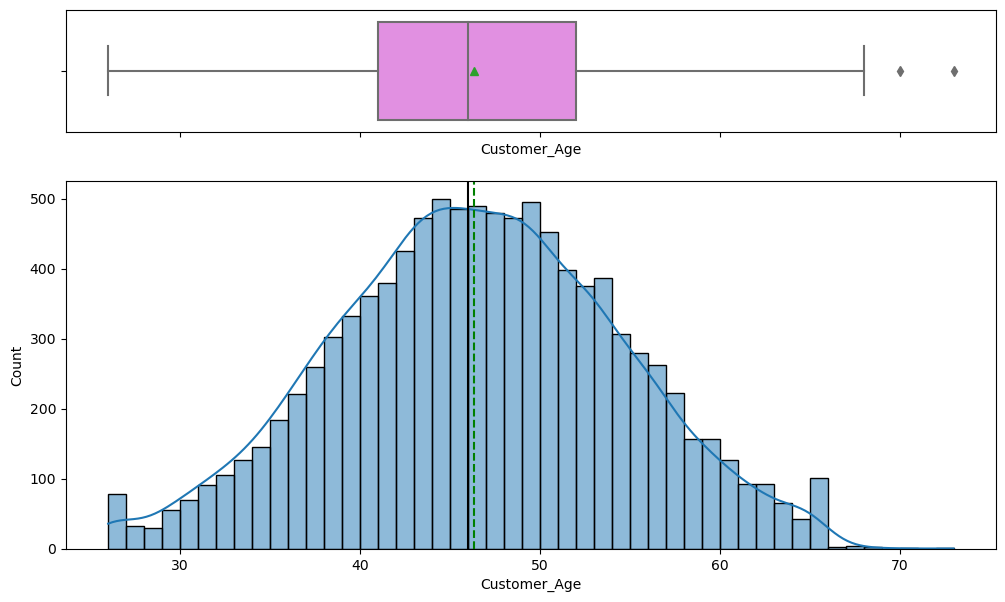

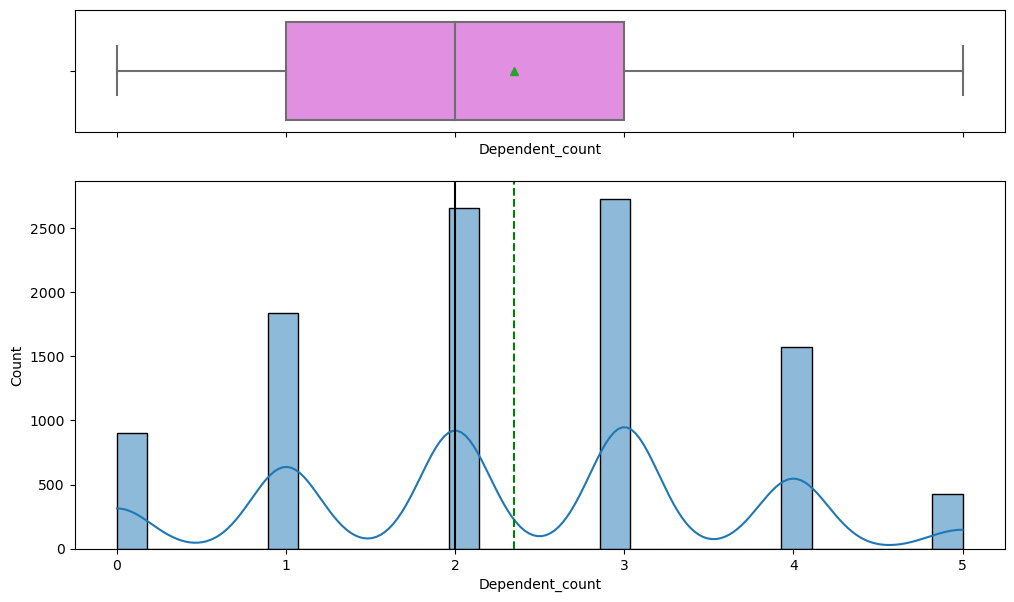

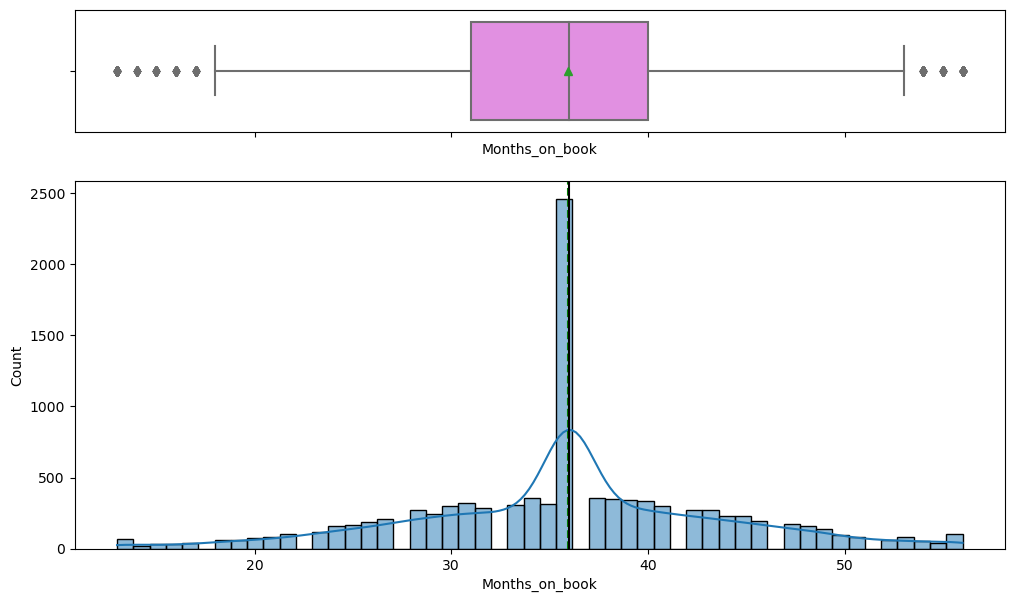

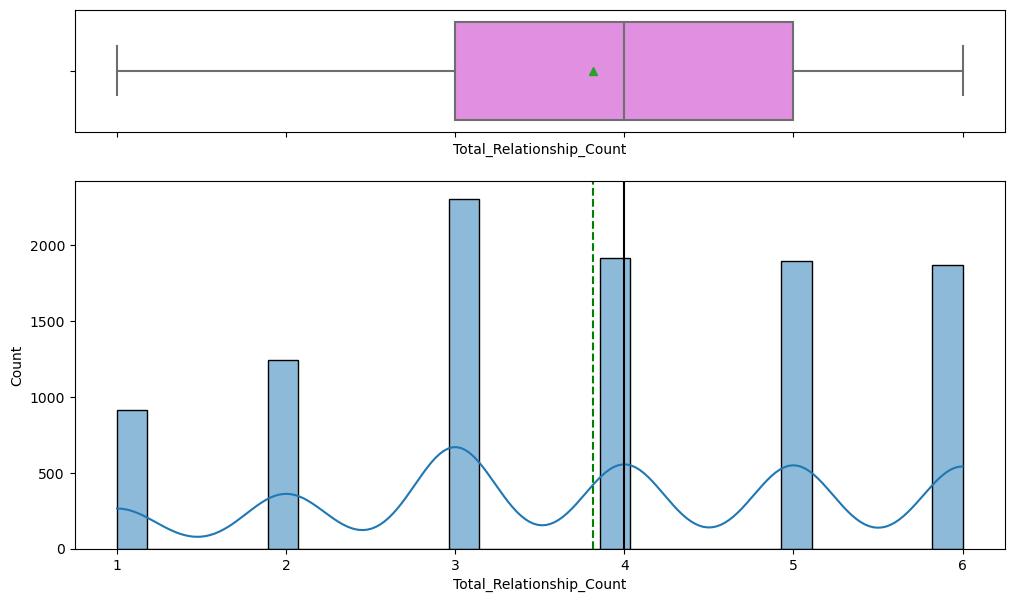

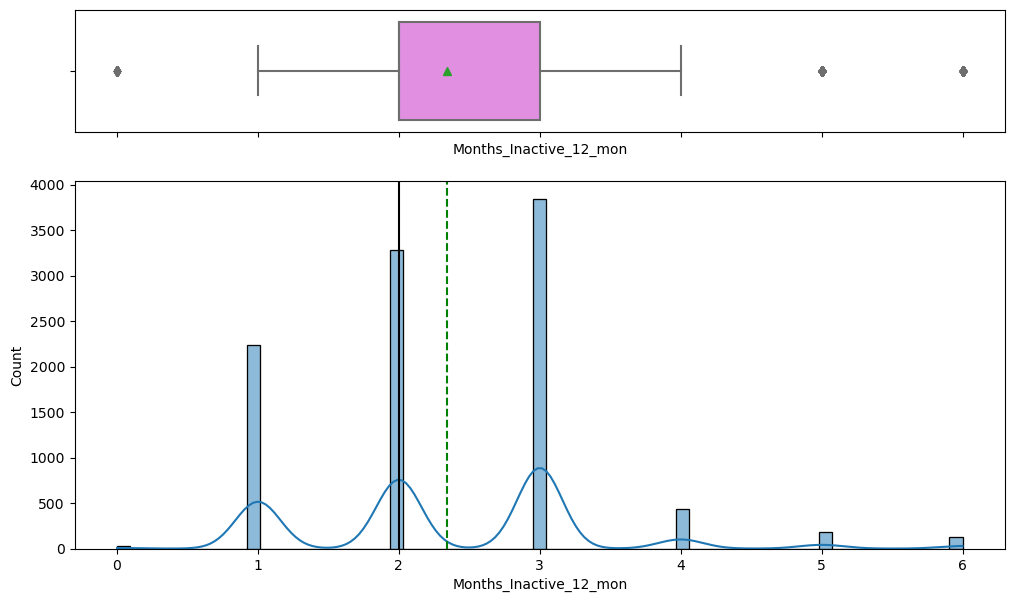

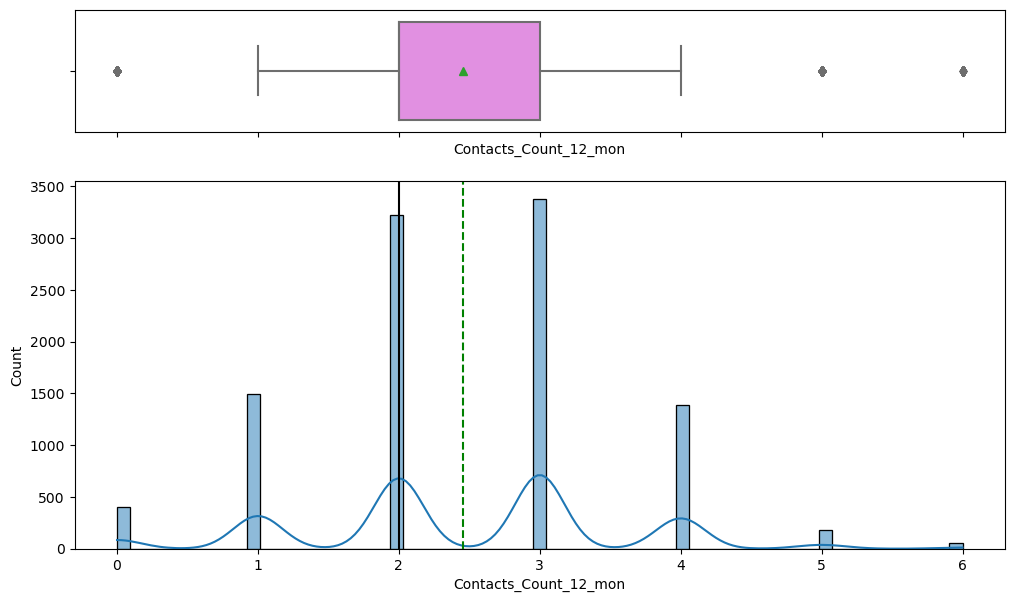

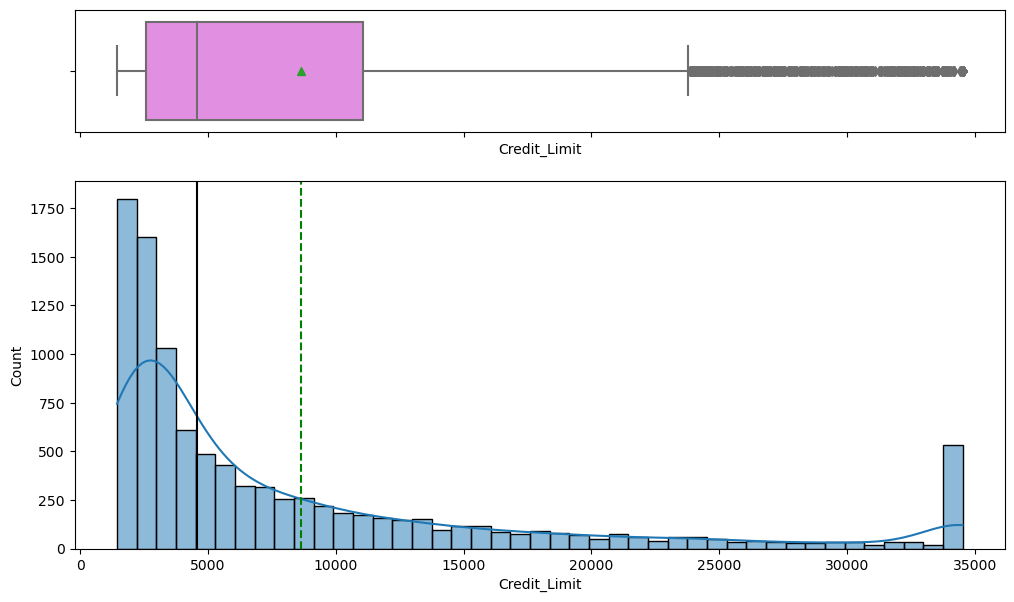

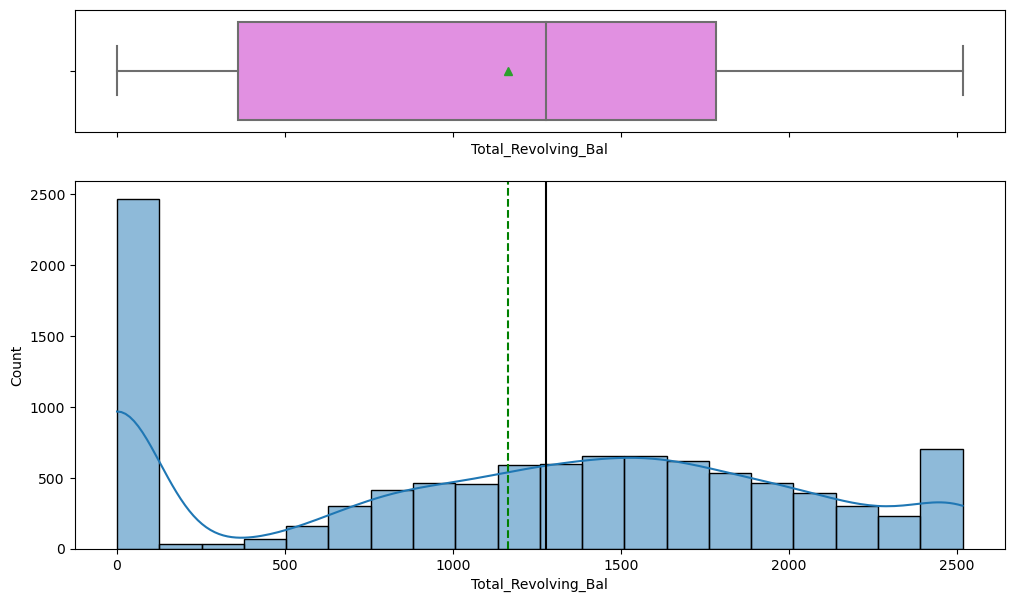

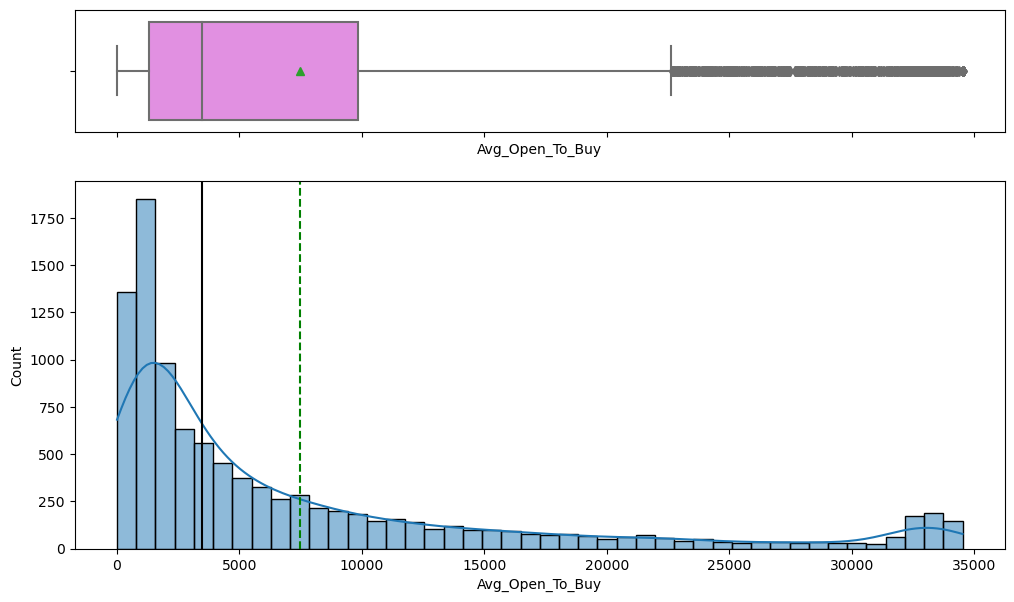

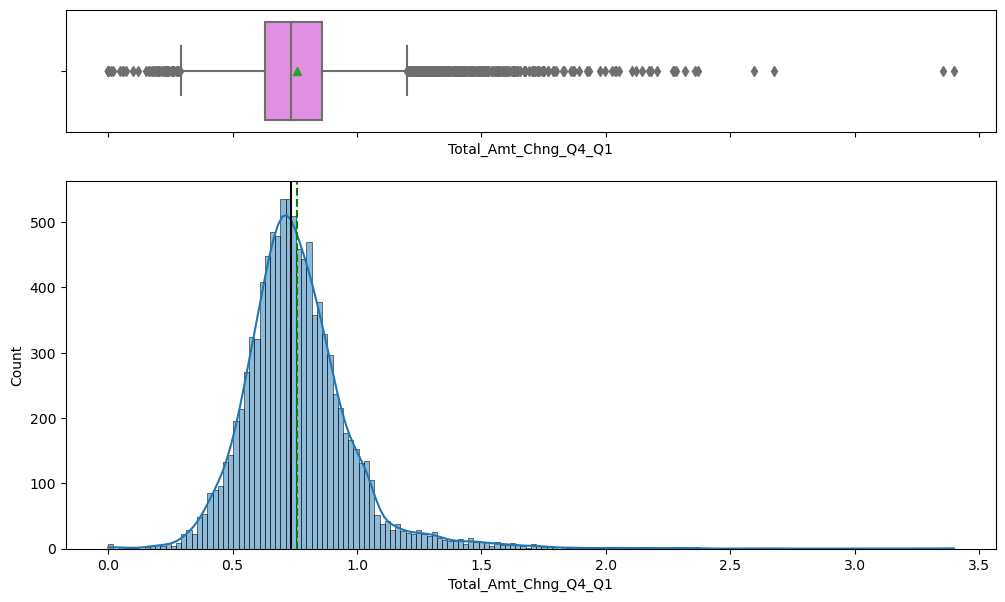

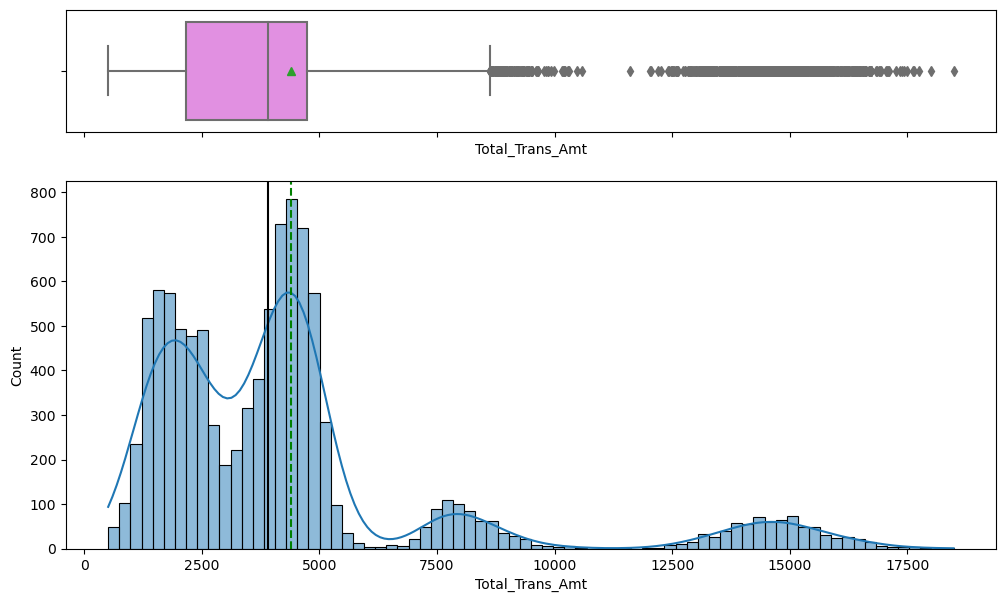

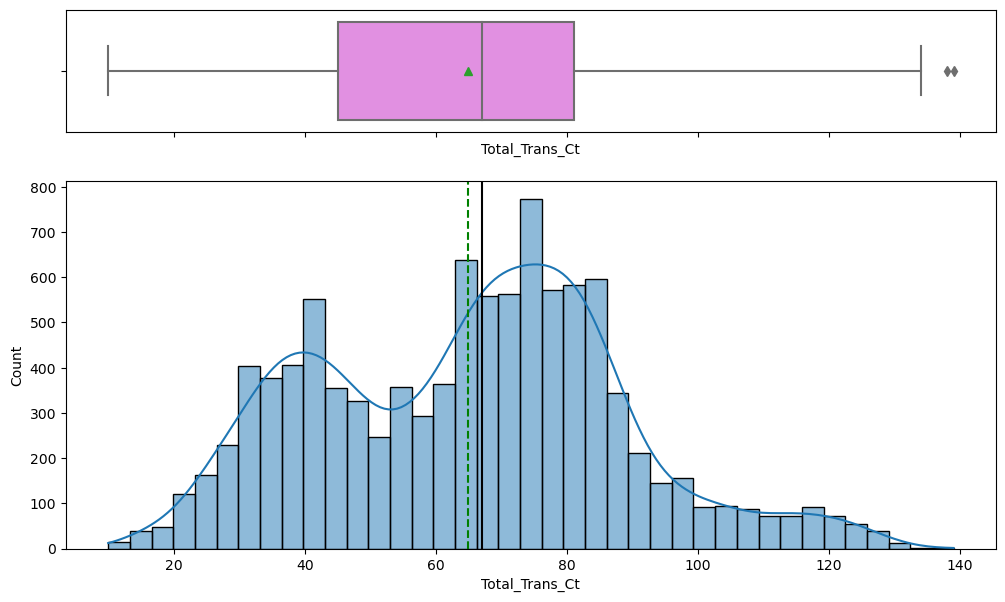

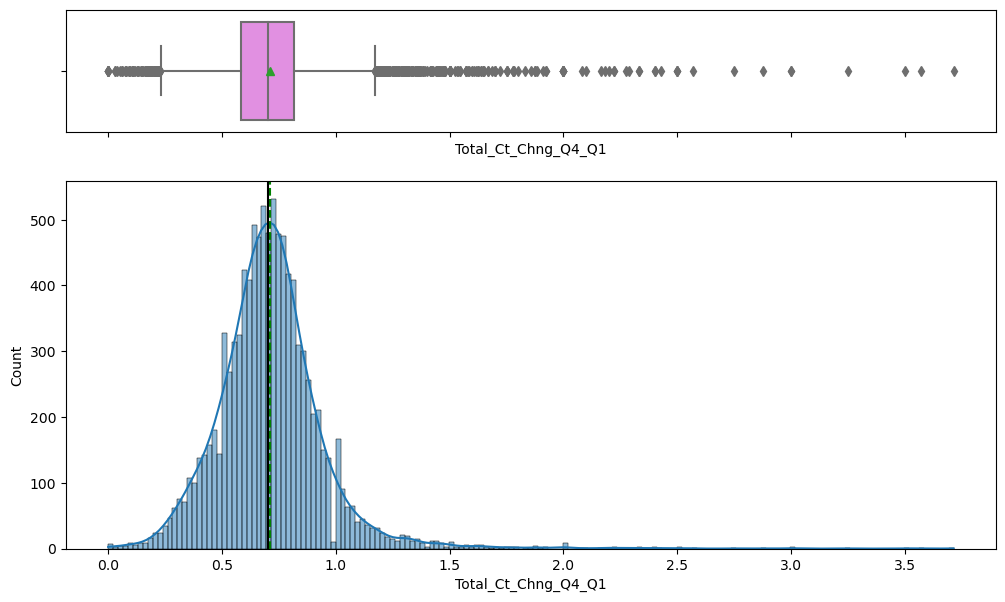

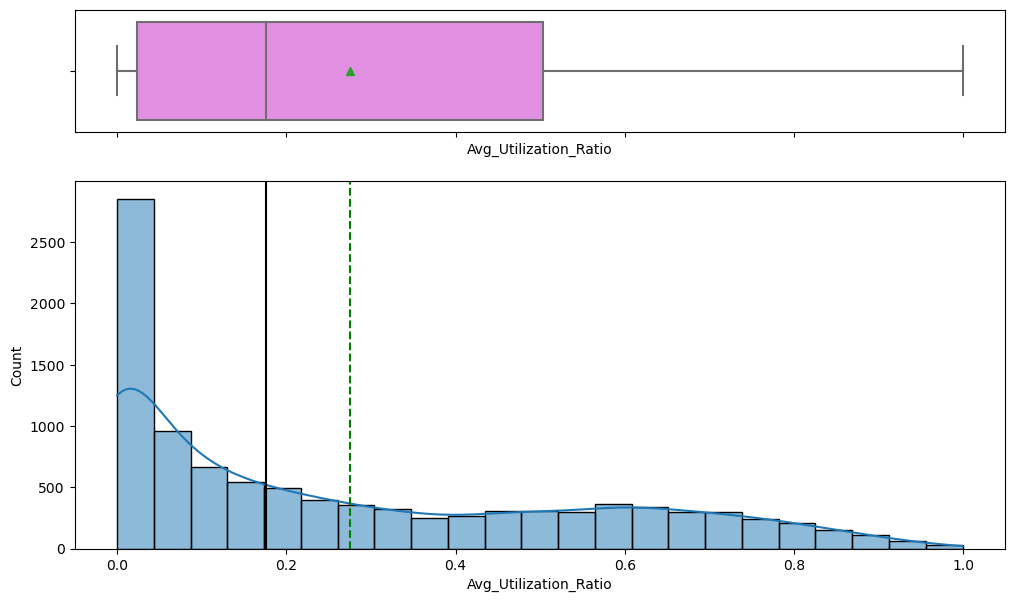

In [281]:
#Plot everything in a loop to look at distribution of all numeric columns
for item in list(churn.select_dtypes(include=["int64","float64"])):
    histogram_boxplot(churn, item, kde=True)

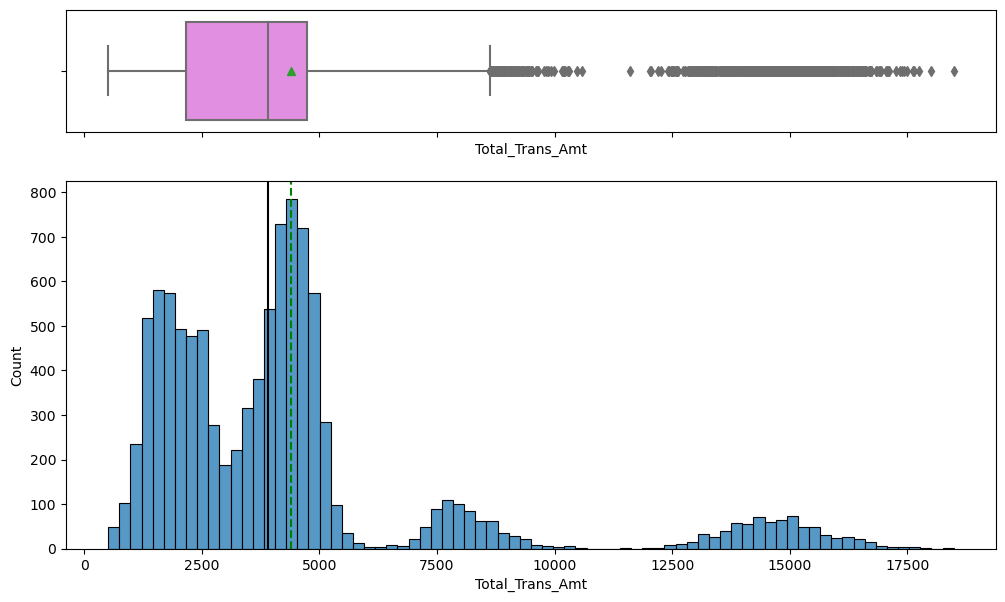

In [282]:
histogram_boxplot(churn,"Total_Trans_Amt")


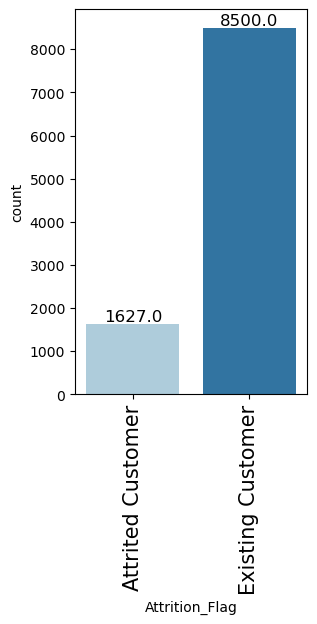

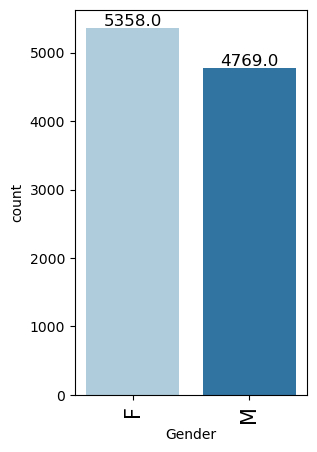

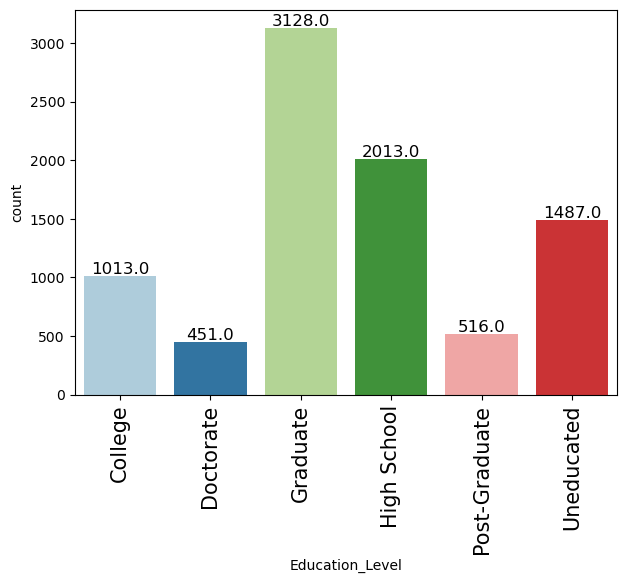

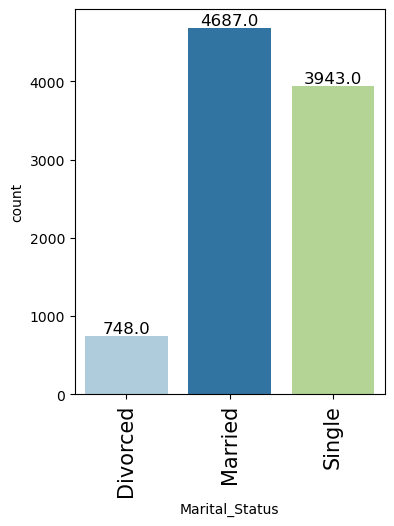

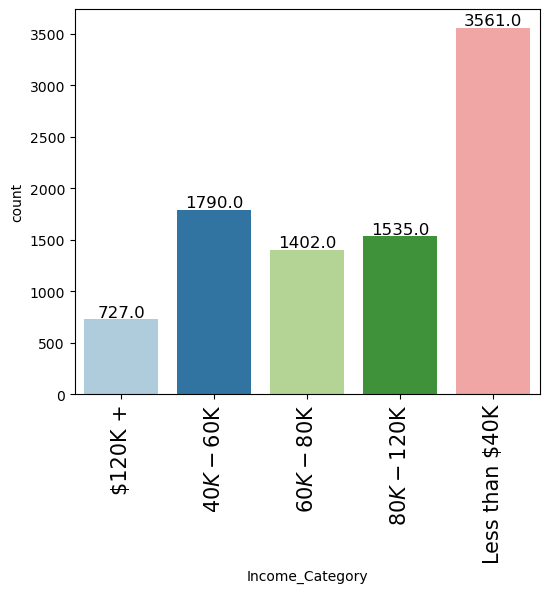

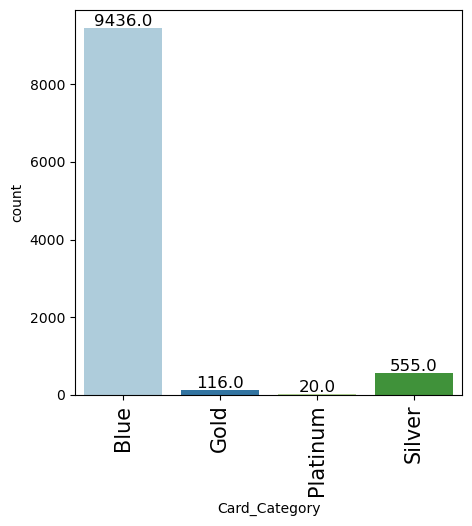

In [283]:
#Plot in a loop to look at distribution of objects
for item in list(churn.select_dtypes(exclude=["int64","float64"])):
    labeled_barplot(churn, item)

Observations:
- Customer age mean is 46, with the majority of the customers between 40 and 55 years old.
- The mean dependent per customer is 2.3 and the data for dependents is right skewed. Dependent counts range from 0 - 5
- Months on book is about 36 months on average. The data for months on book ranges from 0 to over 55 months and is left-skewed.
- Total Relationship count (number of products held) on average is a little less than 4 and ranges from 1 to 6
- Months inactive  on average is 2.3 
- Contacts count on average is 2.5
- Credit Limit on average is about $8K, the data is skewed right with many outliers in the higher limits.
- Total revolving balance is $1.2k and data is skewed left with many 0 balance accounts
- Average open-to-buy credit line is on average $7.5k but right skewed with many high limit accounts and outliers in these high limit accounts.
- Total amount change Q4 to Q1 on average is $750 and data right skewed with many outliers in higher limit accounts
- Total transaction amount on average is $4k with right-skewed data with outliers in high limits
- There are 16% attrited customers and 84% existing customers
- There are 53% Females and 47% males in the data set
- Most in the data set are educated, only 14% are uneducated out of 10127
- Most in the data are married 46% or single 38%, only 748 7.3% of the data set shows as divorced. There is some missing data as well.
- The largest income category is under 40k group with 35% of the sample
- The card type that is the most popular is blue with 93% of the sample

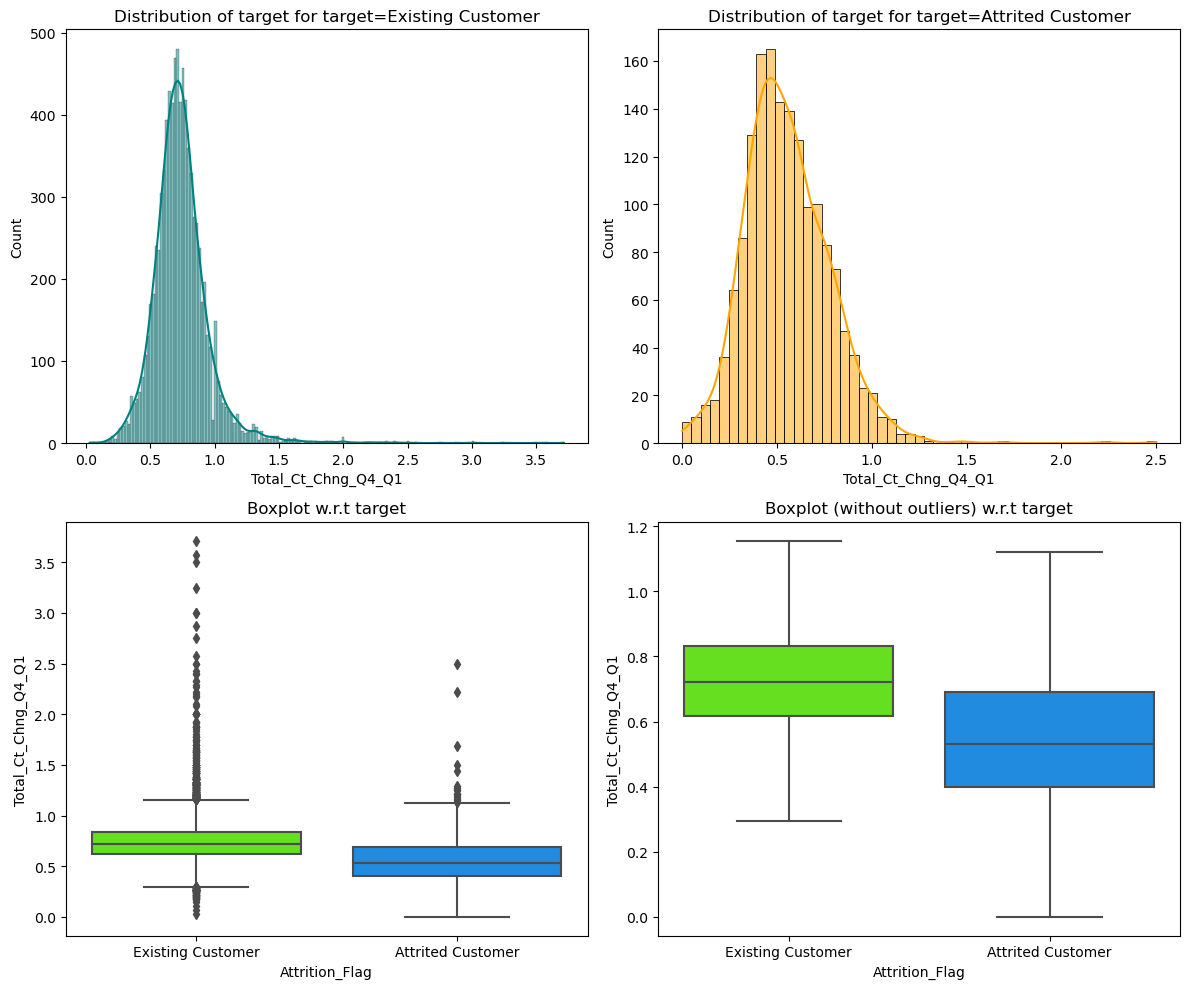

In [284]:
distribution_plot_wrt_target(churn,"Total_Ct_Chng_Q4_Q1","Attrition_Flag")

#### Observations
- The distributions are not vastly different between Existing and Attrited
- Attrited customers on average have a smaller change in trasaction ct from q4 to Q1

In [285]:
churn["Months_Inactive_12_mon"].unique()

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

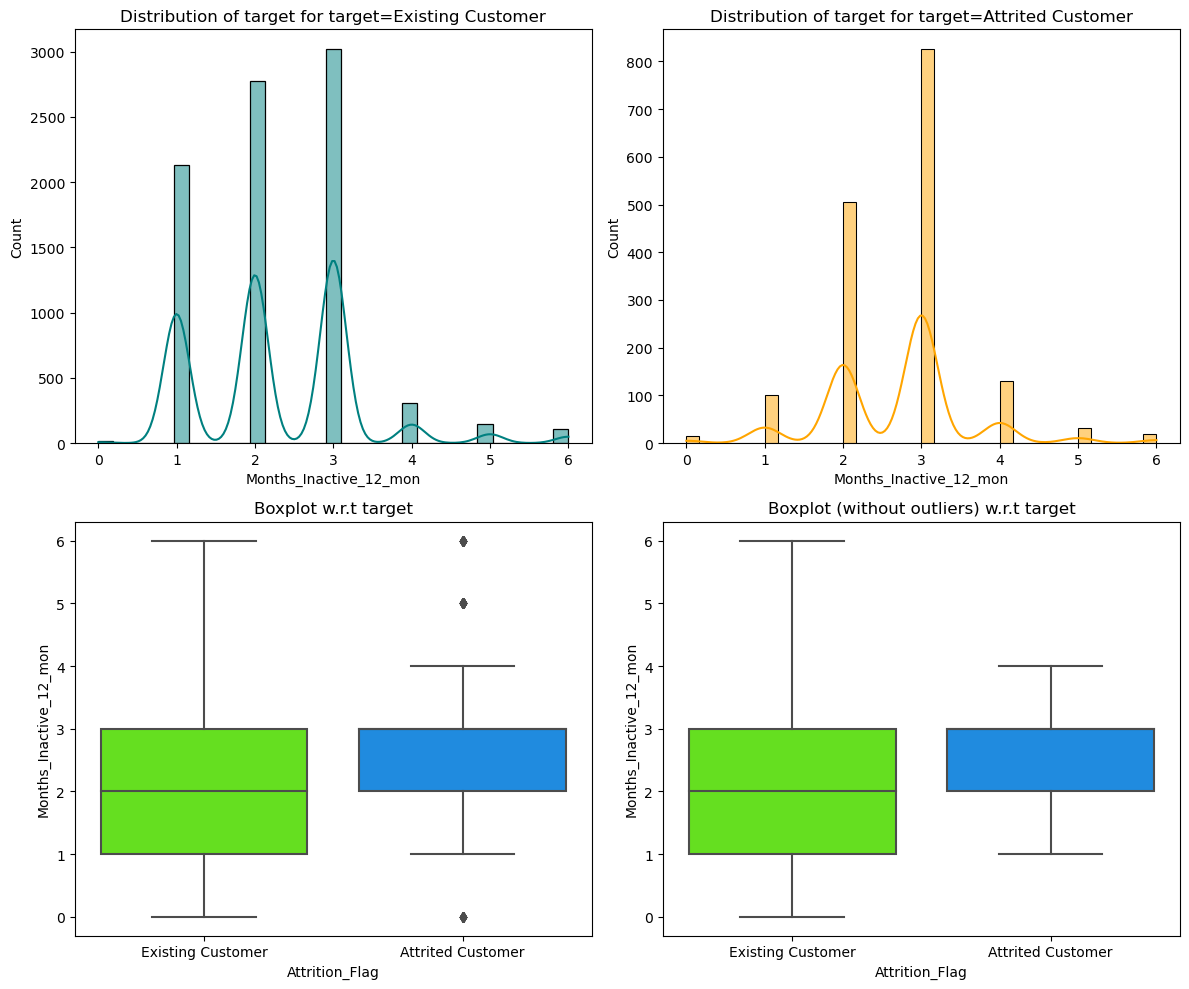

In [286]:
distribution_plot_wrt_target(churn,"Months_Inactive_12_mon", "Attrition_Flag") 

#### Observations
- Total ct change in existing customers has a broader distribution from 0 to 6 months
- Total ct change in attrified customers has a smaller distribution from 1 to 4 months

Reviewing Correlation

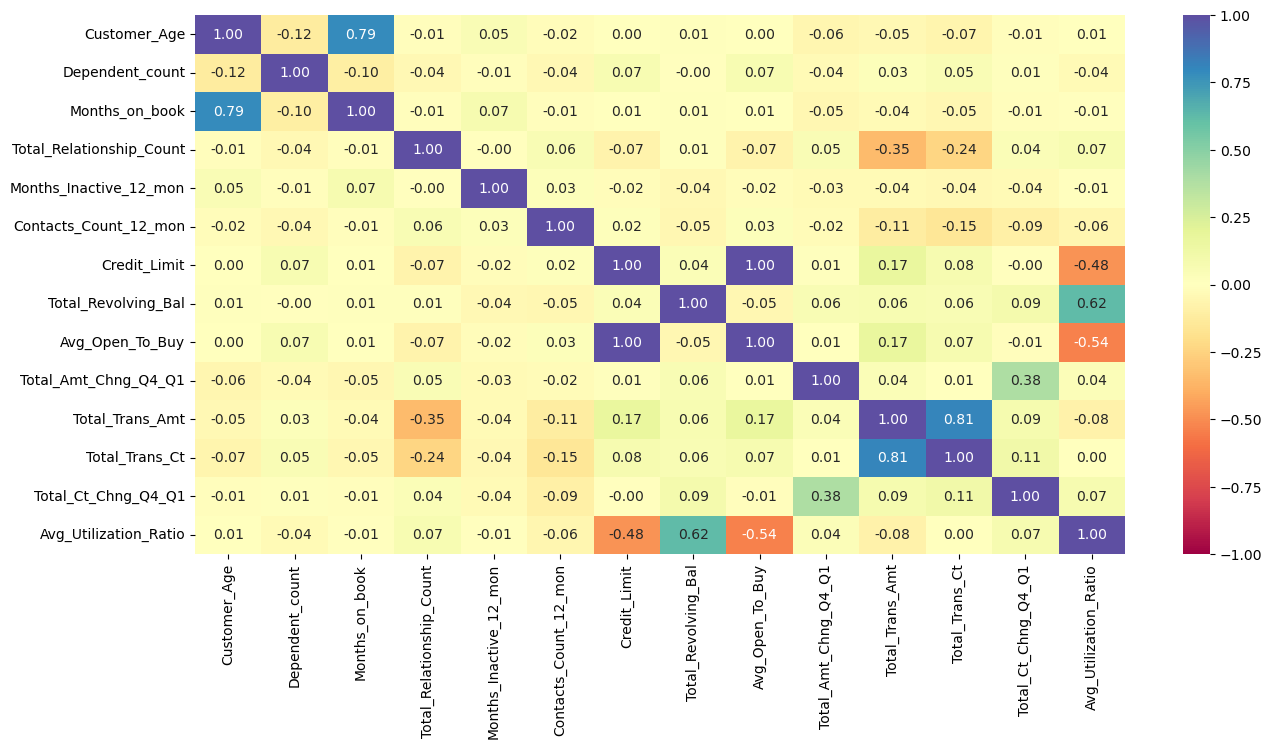

In [287]:
plt.figure(figsize=(15, 7))
sns.heatmap(churn.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations
- Average utilization ratio and credit limit have some correlation
- Average utilization ratio and Total revolving balance have some correlation
- Average utilization ratio and Average open to buy have higher correlation
- Months on book and customer age have high correlation
- Light correlation exists between Total Trans amount and Total relationship count
- Light correlation exists between Total counbt change Q4 to Q1 and Total amount chnage Q4 to Q1

In [288]:
#sns.pairplot(churn, hue = 'Attrition_Flag' , diag_kind='hist')

Bivariate Analysis

<Figure size 4000x3000 with 0 Axes>

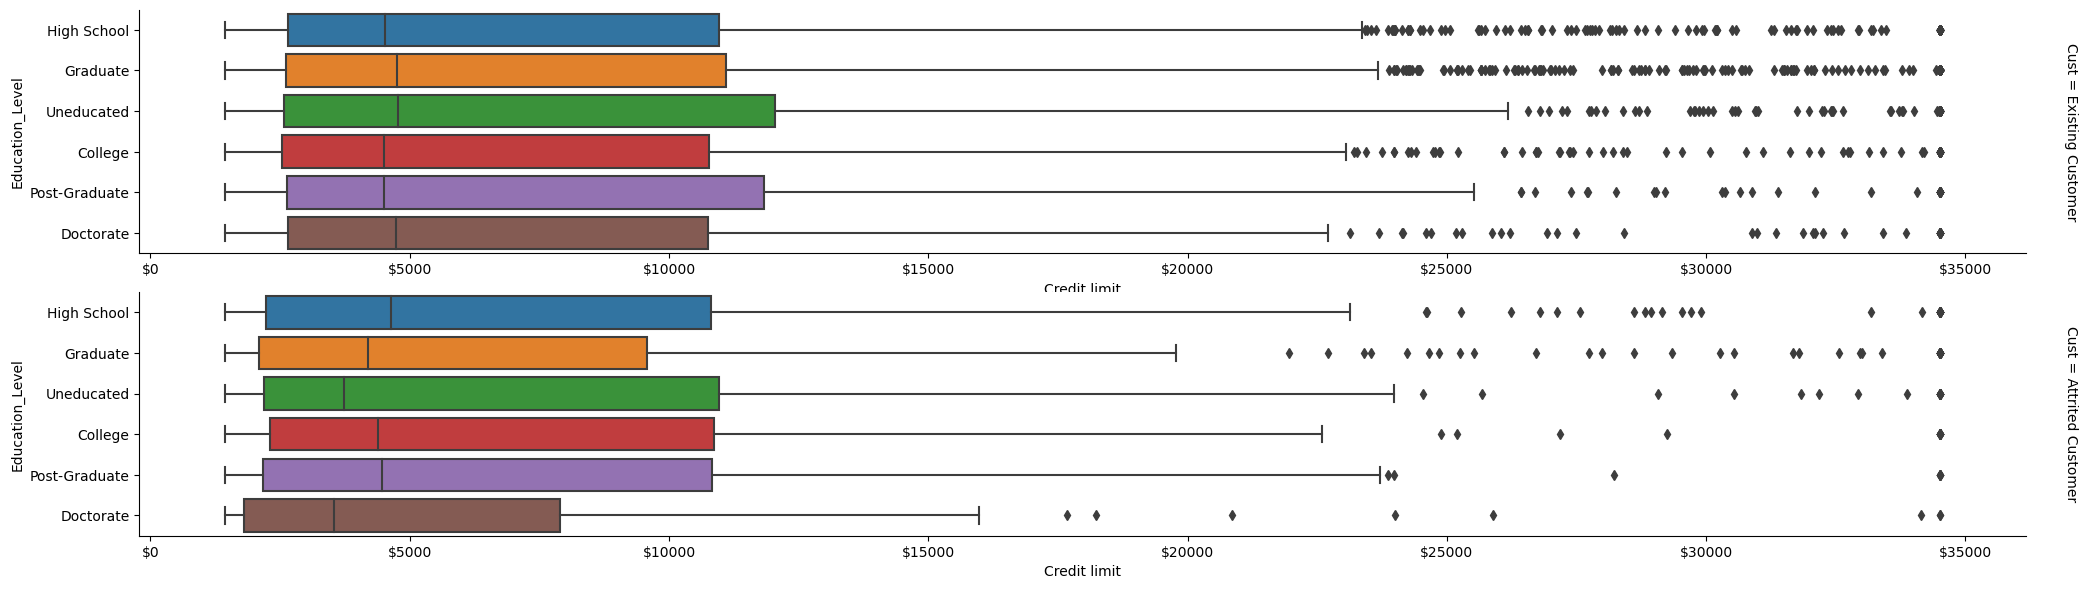

In [289]:
# Plot education, loan and income
plt.figure(figsize=(40, 30))

g = sns.catplot(
    data=churn,
    x="Credit_Limit", y="Education_Level", row="Attrition_Flag",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=3, aspect=7,
)
g.set(xlabel="Credit limit", ylabel="Education_Level")
g.set_titles(row_template="Cust = {row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

plt.show()

#### Observations
- Data between Education Level, credit limit by customer attrition flag are pretty similar expect Doctorates that attrited have lower limits generally
- There are lots of outliers in credit limit on the higher limits but its' data that is right, many people can have high credit limits.

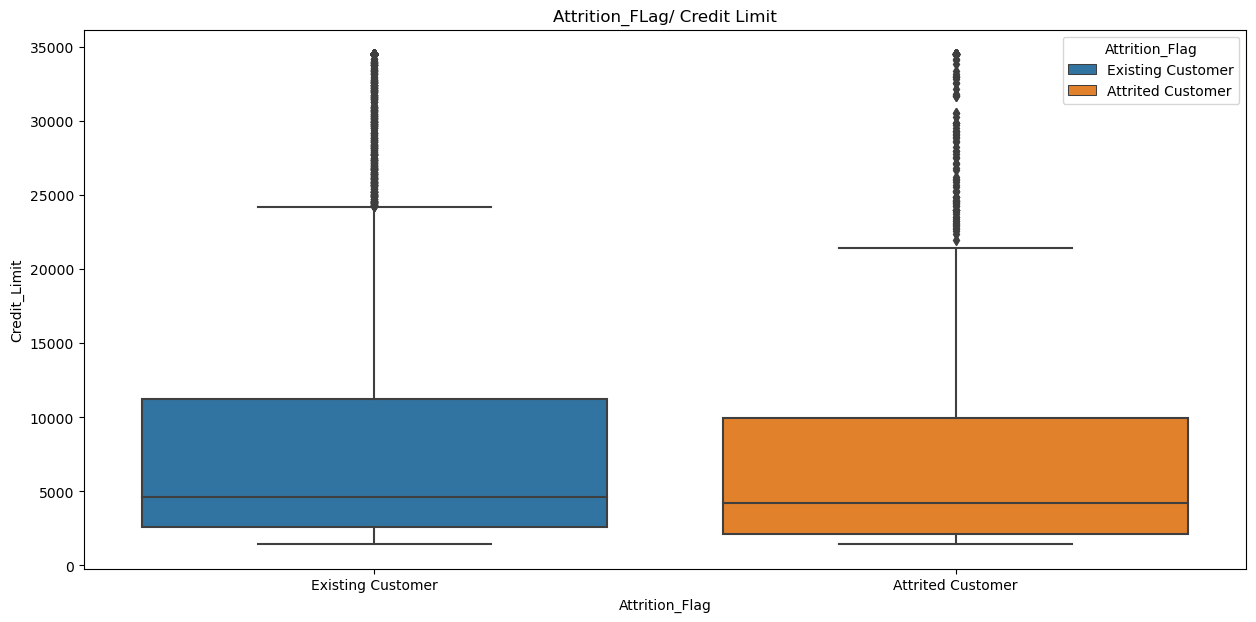

In [290]:
# Plot Credit limit by Attrition FLag
box_plot("Attrition_Flag","Credit_Limit","Credit_Limit","Attrition_Flag","Attrition_FLag/ Credit Limit","Attrition_Flag")

#### Oberservations
- Data is pretty similar for credit limit across the groups for the target variable.

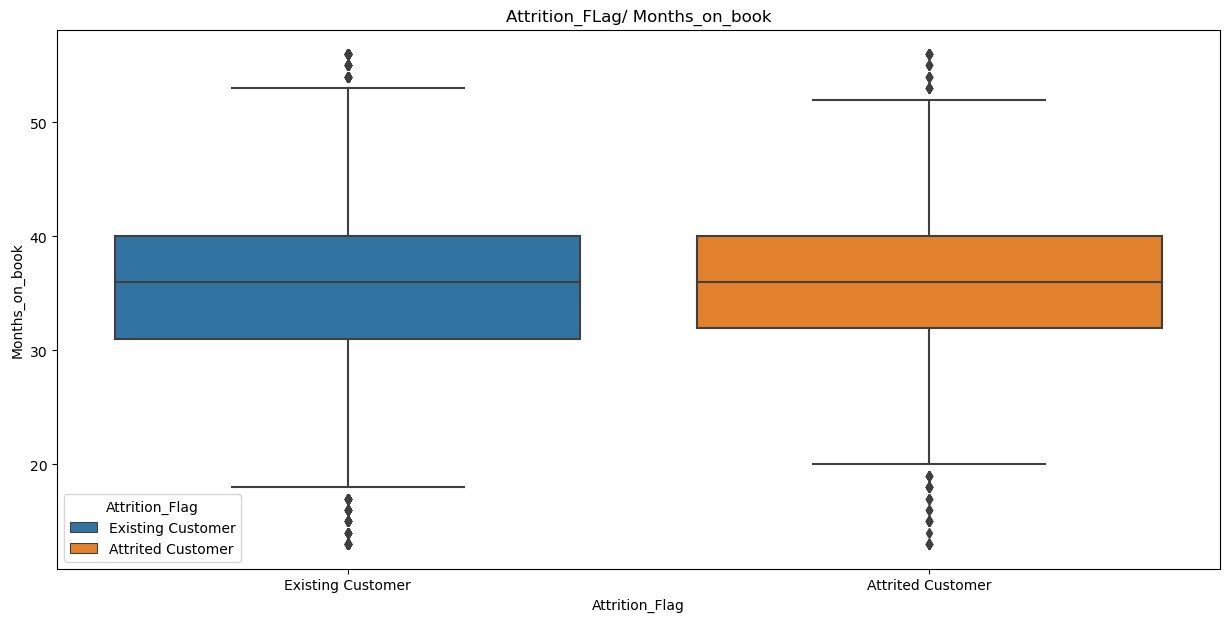

In [291]:
# Plot Credit limit by Attrition FLag
box_plot("Attrition_Flag","Months_on_book","Months_on_book","Attrition_Flag","Attrition_FLag/ Months_on_book","Attrition_Flag")

#### Oberservations
- Data is pretty similar for Months on book across the groups for the target variable.

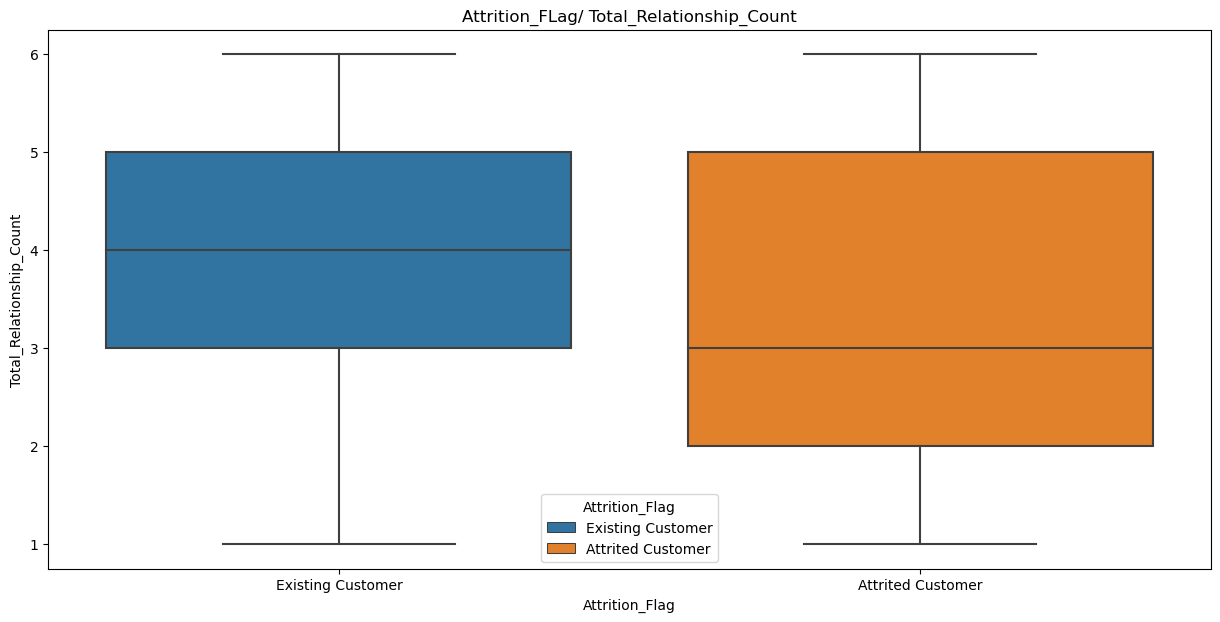

In [292]:
# Plot Total_Relationship_Count by Attrition FLag
box_plot("Attrition_Flag","Total_Relationship_Count","Total_Relationship_Count","Attrition_Flag","Attrition_FLag/ Total_Relationship_Count","Attrition_Flag")

#### Observations
- Q1 and Q2 in attrited customer group had 3 or less relationships
- Existing customers Q2-Q4 had 3 or more relationships
- Might indicate having more prodcuts owned can improve customer satisfaction

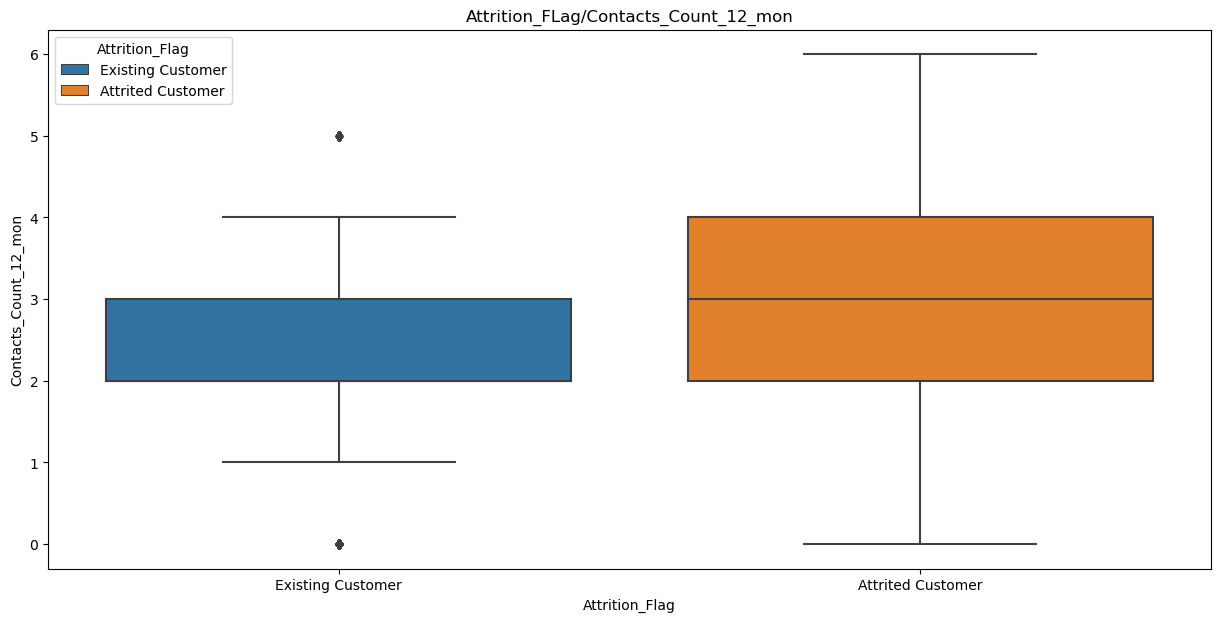

In [293]:
# Plot Contacts count by Attrition FLag
box_plot("Attrition_Flag","Contacts_Count_12_mon","Contacts_Count_12_mon","Attrition_Flag","Attrition_FLag/Contacts_Count_12_mon","Attrition_Flag")

#### Observations
- Existing customers had at least 1 contact and up to 4 when removing outliers
- Attrited customers had anywhere from 0 to 6 contacts
- Not much to glean from this.

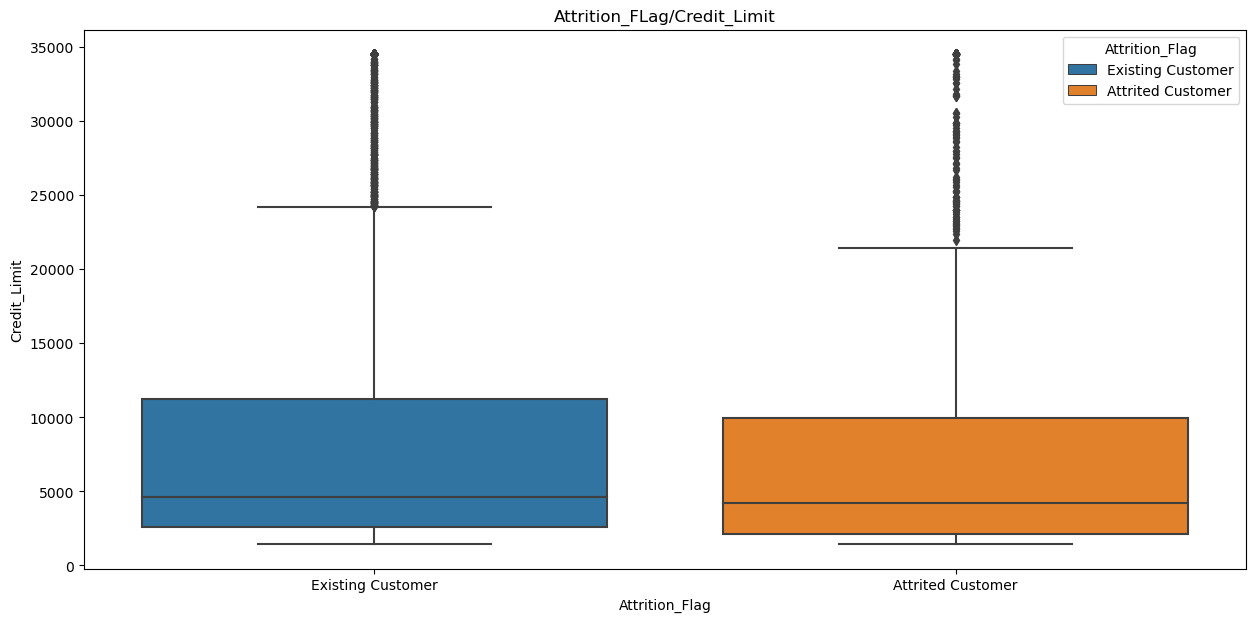

In [294]:
# Plot Contacts count by Attrition FLag
box_plot("Attrition_Flag","Credit_Limit","Credit_Limit","Attrition_Flag","Attrition_FLag/Credit_Limit","Attrition_Flag")

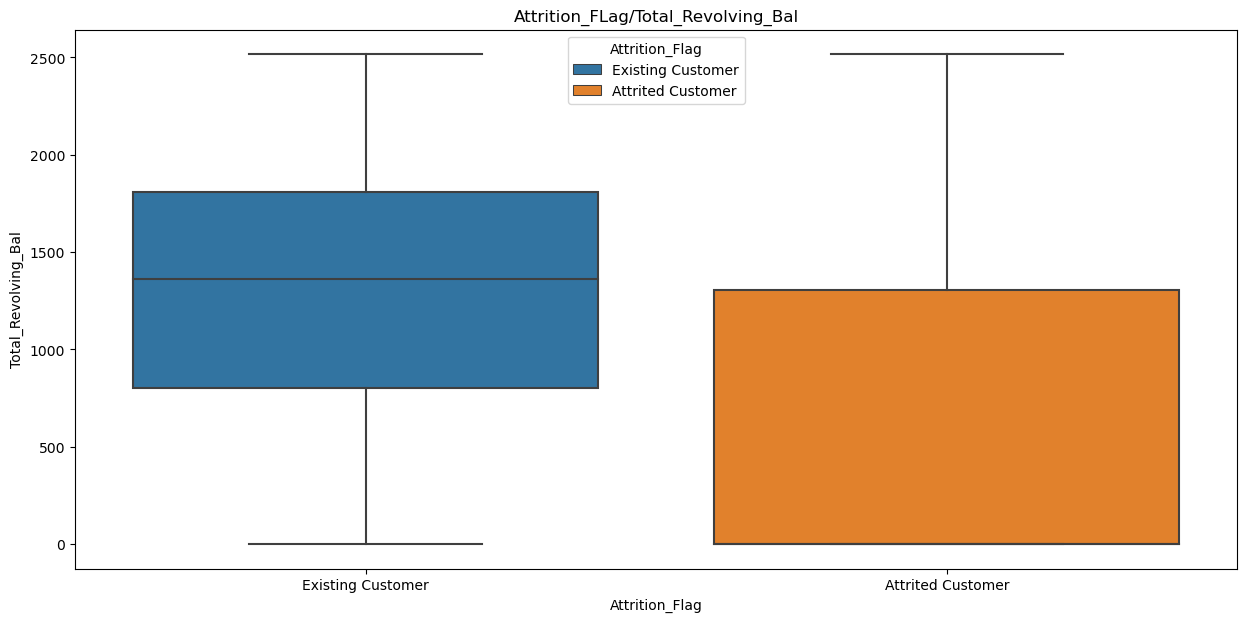

In [295]:
# Plot Total_Revolving_Bal by Attrition FLag
box_plot("Attrition_Flag","Total_Revolving_Bal","Total_Revolving_Bal","Attrition_Flag","Attrition_FLag/Total_Revolving_Bal","Attrition_Flag")

#### Observations
- Total revolving balance is higher in the existing customers
- Bottom three quartiles below 1250 for attrited 
- Q3 and Q4 for existing customers above 1300
- Attrited customers on average have a lower revolving balance.


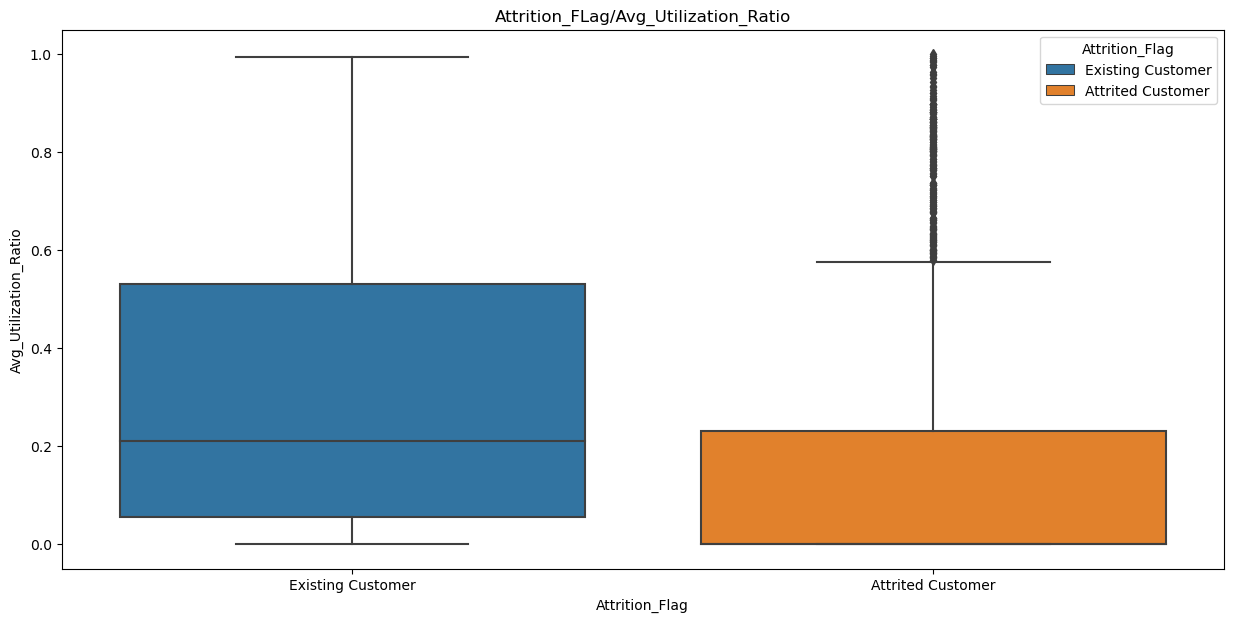

In [296]:
# Plot Avg_Utilization_Ratio by Attrition FLag
box_plot("Attrition_Flag","Avg_Utilization_Ratio","Avg_Utilization_Ratio","Attrition_Flag","Attrition_FLag/Avg_Utilization_Ratio","Attrition_Flag")

#### Observations
- Average utilization Q3 and Q4 in existing customers is .2 our above
- Average utilization for Q1 - Q3 quartiles is .2 or below for attrited customers
- Attrited customers will generally have a lower utilization ratio.


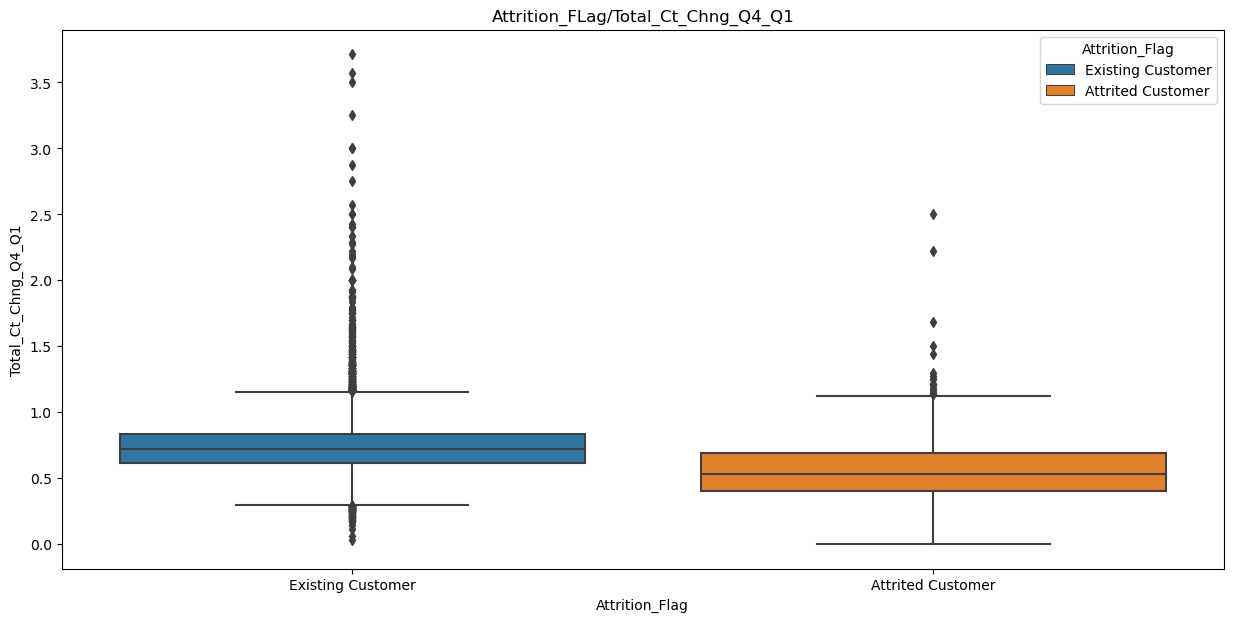

In [297]:
# Plot Total ct change by Attrition FLag
box_plot("Attrition_Flag","Total_Ct_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Attrition_Flag","Attrition_FLag/Total_Ct_Chng_Q4_Q1","Attrition_Flag")

#### Observations
- Total ct change in existing customers is 650k or above for Q2-Q4
- Total ct change for Q1 - Q3 quartiles is 700k or below for attrited customers
- Attrited custmers will generally have a lower Total Ct change Q1 to Q4 than existing customers.


**Observations from EDA**




## Data Pre-processing

In [298]:
preProcess = churn.copy()

In [299]:
preProcess.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [300]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    #Treat outliers in a list of variables

    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [301]:
#treat all outliers by removing them
#numerical_col = preProcess.select_dtypes(include=np.number).columns.tolist()
#preProcess = treat_outliers_all(preProcess, numerical_col)

Outlier Detection

In [302]:
# checking the % outliers
((preProcess.select_dtypes(include=["float64", "int64"]) < lower) | (preProcess.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(preProcess) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

#### Observations
- There are a lot of outliers in several of the columns but none that I believe are concerning and removing or imputing would not be recommended as the data is real.


In [303]:

# we need to pass numerical values for each categorical column for imputation so we will label encode them
gender = {"M": 0, "F": 1}
preProcess["Gender"] = preProcess["Gender"].map(gender)

education_level = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
preProcess["Education_Level"] = preProcess["Education_Level"].map(education_level)

income_category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
}
preProcess["Income_Category"] = preProcess["Income_Category"].map(income_category)

## Missing value imputation




In [304]:
# look to ensure all data encoded as expected
preProcess.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,0,3,1.000,Married,2.000,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,1,5,3.000,Single,0.000,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,0,3,3.000,Married,3.000,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,1,4,1.000,NaN,0.000,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,0,3,0.000,Married,2.000,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


Observations:
- Values for Income_Category, Education_Level and Gender have been encoded as shown above.
- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [305]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

#### Setting up model

In [306]:
# Setting up data set and dropping attrition flag on indendent variable list
X = preProcess.drop(["Attrition_Flag"], axis=1)
# setting up independent varible and setting flag to numeric
y = preProcess["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

In [307]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [308]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [309]:
churn.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

#### Imputing using the SimpleImputer

In [310]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [311]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

All missing values have been dealt with.

In [312]:
# create dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 22) (2026, 22) (2026, 22)


#### Observations
* After encoding there are 27 columns.

### Model Building with original data

In [313]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9978427142576975
Random forest: 1.0
GBM: 0.9923514414591096
Adaboost: 0.9831339478329084
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9747058823529412
Random forest: 0.9882352941176471
GBM: 0.9882352941176471
Adaboost: 0.9794117647058823
XGBoost: 0.9894117647058823
dtree: 0.9552941176470588


In [314]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:



Bagging: Training Score: 0.9978, Validation Score: 0.9747, Difference: 0.0231
Random forest: Training Score: 1.0000, Validation Score: 0.9882, Difference: 0.0118
GBM: Training Score: 0.9924, Validation Score: 0.9882, Difference: 0.0041
Adaboost: Training Score: 0.9831, Validation Score: 0.9794, Difference: 0.0037
XGBoost: Training Score: 1.0000, Validation Score: 0.9894, Difference: 0.0106
dtree: Training Score: 1.0000, Validation Score: 0.9553, Difference: 0.0447


Observations: Original Data
- Ada boost performs best with a difference of 0.0037
- Gradiant boost is second with a difference of 0.0041
- Third is XGBoost with a difference of 0.0106

### Model Building with Oversampled data


In [315]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5099
Before Oversampling, counts of label 'No': 976 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 22)
After Oversampling, the shape of train_y: (10198,) 



In [316]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:



Bagging: 0.9947048440870759
Random forest: 1.0
GBM: 0.9817611296332615
Adaboost: 0.963326142380859
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9588235294117647
Random forest: 0.9752941176470589
GBM: 0.9794117647058823
Adaboost: 0.9588235294117647
XGBoost: 0.9864705882352941
dtree: 0.9435294117647058


In [317]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9947, Validation Score: 0.9588, Difference: 0.0359
Random forest: Training Score: 1.0000, Validation Score: 0.9753, Difference: 0.0247
GBM: Training Score: 0.9818, Validation Score: 0.9794, Difference: 0.0023
Adaboost: Training Score: 0.9633, Validation Score: 0.9588, Difference: 0.0045
XGBoost: Training Score: 1.0000, Validation Score: 0.9865, Difference: 0.0135
dtree: Training Score: 1.0000, Validation Score: 0.9435, Difference: 0.0565


Observations: Oversampling
- Gradient Boost performs best with a difference of 0.0023
- Second best is Adaboost with a difference of 0.0045
- Third is XGBoost with a difference of 0.0135

### Model Building with Undersampled data

In [318]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [319]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5099
Before Under Sampling, counts of label 'No': 976 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 22)
After Under Sampling, the shape of train_y: (1952,) 



In [320]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9948770491803278


Random forest: 1.0
GBM: 0.9692622950819673
Adaboost: 0.9405737704918032
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9152941176470588
Random forest: 0.94
GBM: 0.951764705882353
Adaboost: 0.9217647058823529
XGBoost: 0.9623529411764706
dtree: 0.92


In [321]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9949, Validation Score: 0.9153, Difference: 0.0796
Random forest: Training Score: 1.0000, Validation Score: 0.9400, Difference: 0.0600
GBM: Training Score: 0.9693, Validation Score: 0.9518, Difference: 0.0175
Adaboost: Training Score: 0.9406, Validation Score: 0.9218, Difference: 0.0188
XGBoost: Training Score: 1.0000, Validation Score: 0.9624, Difference: 0.0376
dtree: Training Score: 1.0000, Validation Score: 0.9200, Difference: 0.0800


Observations: Undersampled Data
- Gradient Boost performs best with a difference between validation diff of 0.0175
- Second best is Adaboost with a difference between validation diff of 0.0188
- Third is XGBoost with a difference between validation diff of 0.0376

### HyperparameterTuning

For this process we will use the following methods that performed the besxt in our analysis so far.

- Gradiant boost Oversampled
- Ada boost original data
- Gradient Boost origninal Data



#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

### Tuning AdaBoostClassifier model with Original data

In [322]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {}.\nCV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}.
CV score=1.0:
CPU times: total: 1.03 s
Wall time: 1min 13s


In [323]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [324]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train, y_train)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.920,0.989,0.922,0.954


In [325]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.911,0.988,0.913,0.949


### Tuning Gradiant Boost model with Undersampled data

In [326]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations    
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {}.\nCV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)}.
CV score=0.9364835164835166:
CPU times: total: 984 ms
Wall time: 32.9 s


In [327]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [328]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.940,0.924,0.953,0.939


In [329]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.919,0.921,0.981,0.950


### Tuning Gradiant Boost model with Original data

In [330]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations    
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("The best parameters are {}.\nCV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

The best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)}.
CV score=0.9998039215686274:
CPU times: total: 1.58 s
Wall time: 1min 12s


In [331]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [332]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.915,0.908,0.991,0.947


In [333]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.921,0.986,0.924,0.954


## Model Comparison and Final Model Selection

### Training final performance

In [334]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Original data
Accuracy,0.940,0.915,0.920
Recall,0.924,0.908,0.989
Precision,0.953,0.991,0.922
F1,0.939,0.947,0.954


### Test set final performance

In [335]:
# test performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb1_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_val_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Original data
Accuracy,0.919,0.921,0.911
Recall,0.921,0.986,0.988
Precision,0.981,0.924,0.913
F1,0.950,0.954,0.949


In [252]:
# test performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb1_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_val_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Original data
Accuracy,0.920,0.921,0.911
Recall,0.923,0.986,0.988
Precision,0.981,0.925,0.913
F1,0.951,0.954,0.949


# Business Insights and Conclusions

***

- asdfasdf
-